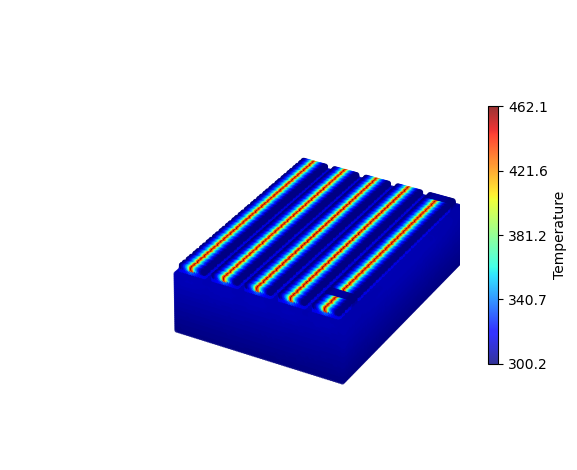

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np

df1 = pd.read_csv('temp.csv')

# Create a high-quality 3D scatter plot
fig = plt.figure(figsize=(6, 12))  # Increase the figure size
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with temperature as the color
scatter = ax.scatter(
    df1['x'], df1['z'], df1['y'], 
    c=df1['Temperature'], cmap='jet', s=10, alpha=0.8  # Added transparency
)

# Hide all axes elements: ticks, labels, grid, and frame
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_frame_on(False)
ax.grid(False)

# Remove the axis itself (box around the plot)
ax.axis('off')

# Adjust limits to ensure data is well-centered
max_range = max(
    df1['x'].max() - df1['x'].min(), 
    df1['y'].max() - df1['y'].min(), 
    df1['z'].max() - df1['z'].min()
)

mid_x = (df1['x'].max() + df1['x'].min()) / 2
mid_y = (df1['y'].max() + df1['y'].min()) / 2
mid_z = (df1['z'].max() + df1['z'].min()) / 2

ax.set_xlim(mid_x - max_range / 2, mid_x + max_range / 2)
ax.set_ylim(mid_y - max_range / 2, mid_y + max_range / 2)
ax.set_zlim(mid_z - max_range / 2, mid_z + max_range / 2)

# Get the min and max temperature values
temp_min = df1['Temperature'].min()
temp_max = df1['Temperature'].max()

# Generate at least 5 ticks between min and max temperature values
tick_values = np.linspace(temp_min, temp_max, 5)

# Create the color bar with min, max, and intermediate ticks
cbar = plt.colorbar(scatter, ax=ax, shrink=0.22, aspect=26)
cbar.set_label('Temperature')
cbar.set_ticks(tick_values)


# Use tight layout for better spacing
plt.tight_layout()

# Save the high-quality figure with higher DPI
plt.savefig("3d_scatter_plot.png", dpi=100, bbox_inches='tight')

# Show the figure
plt.show()
